<h1 align="center"> Exploratory Data Analysis - Retail</h1>

<h2>To be submited to TSF</h2>

<ul>
    <li><h5>Names:</h5> <h2>Felix Hirwa Nshuti</h2></li>
    <li><h5>Track:</h5> <h3>Data Science and Business Analytics</h3></li>
    <li><h5>Task: </h5> <h3>3</h3></li>
    <li><h5>Data Source:</h5><h3><a href="https://bit.ly/3i4rbWl" target="_blank">https://bit.ly/3i4rbWl</a></h3></li>
    </ul>

<h2>Table of Contents</h2>
<p>In this project,I will explore the weakness of the Store reffering to sales and Profits.</p>
<ul>
  

<li><a href="#Preparation">Data Processing</a></li>
<li><a href="#Data">Data Vizualization</li>
<li><a href="#viz">Dashboard Making</a></li>

</ul>

Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                            
import seaborn as sns 
%matplotlib inline

<h3>Loading the Dataset</h3>

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Describing the data

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Checkig Null values and Duplicates

In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.duplicated().sum()

17

In [8]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Plotting the heatmap to visualize the effect of every variable

Text(0.5, 1.0, 'Heatmap for Correllation')

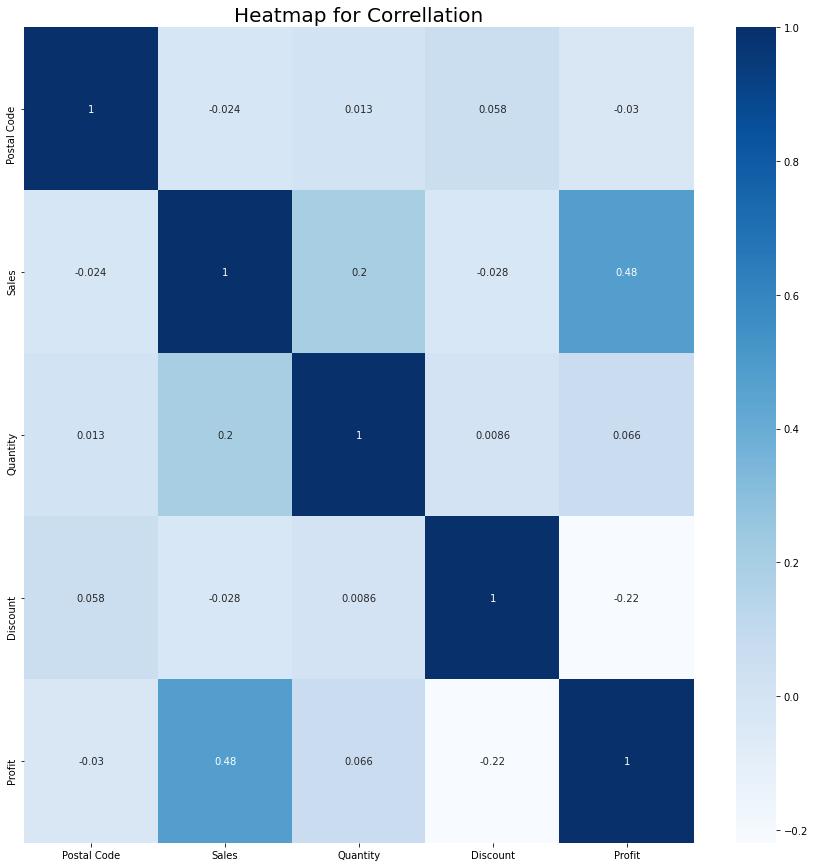

In [9]:
corr_matrix=data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,cmap="Blues")
plt.title("Heatmap for Correllation", fontsize=20)

<p>As the Dataset shows that The stores are in many states of US. This stores sells 3 different categories: Office Supplies, Furniture and Technology to segments Consumer , Corporate & Home Office. They also provide 'Second    Class', 'Standard Class', 'First Class', 'Same Day' types of delivery.</p>

In [10]:
data_sales = pd.DataFrame(data.groupby("Region")[['Sales','Profit']].sum()).reset_index()
data_sales

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


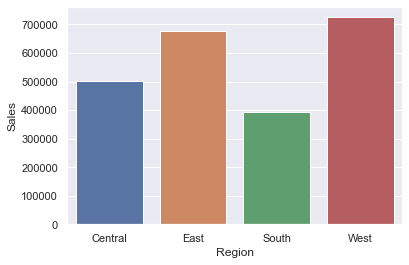

In [11]:
sns.set(style = "darkgrid")
sns.barplot(x = "Region",y ="Sales",data=data_sales)

##### For now thet East and west have more sales compared to other regions

In [12]:
data_category = pd.DataFrame(data.groupby("Category")[['Sales','Profit']].sum()).reset_index()
data_category

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


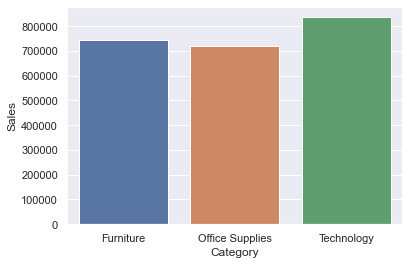

In [13]:
sns.set(style = "darkgrid")
sns.barplot(x = "Category",y ="Sales",data=data_category)

##### The technology Field has more sales compared to other fields

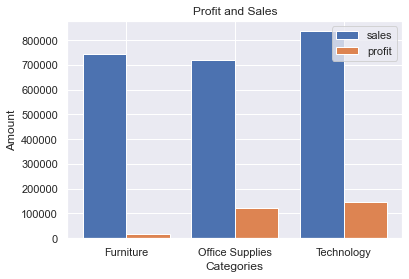

In [14]:
w = 0.4
bar1 = np.arange(len(data_category['Category']))
bar2 = [i+w for i in bar1]
plt.bar(x=bar1,height='Sales',width = w,label='sales',data=data_category)
plt.bar(x=bar2,height='Profit',width = w,label='profit',data=data_category)
plt.ylabel("Amount")
plt.xlabel('Categories')
plt.xticks(bar1+w/2,data_category['Category'])
plt.title("Profit and Sales")
plt.legend()

<p> When we take a closer look at this bar plot we can conclude that the furniture has low profit while the office supplies
and technology have a fairly good profits"

###### Let's try to see how the sales are distributed by states

In [15]:
data_states=data_category = pd.DataFrame(data.groupby("State")[['Sales','Profit']].sum()).reset_index()
data_states

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579
5,Connecticut,13384.3570,3511.4918
6,Delaware,27451.0690,9977.3748
7,District of Columbia,2865.0200,1059.5893
8,Florida,89473.7080,-3399.3017
9,Georgia,49095.8400,16250.0433


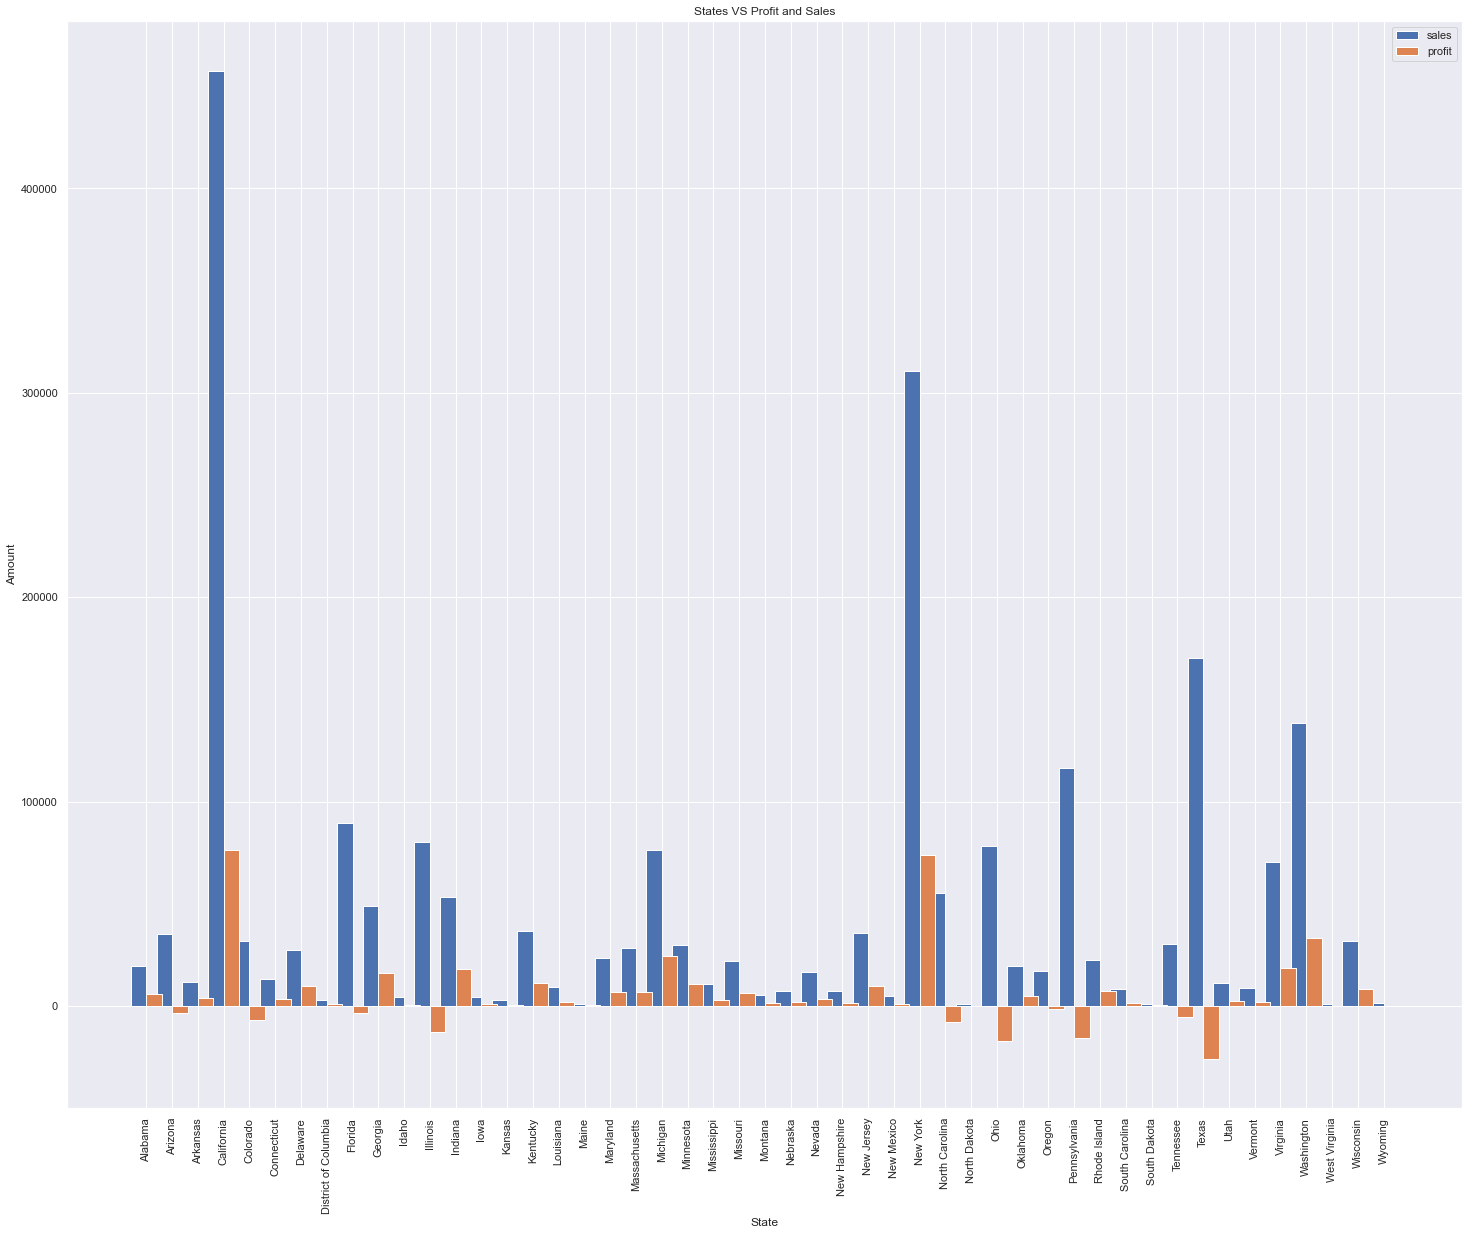

In [16]:
w = 0.6

bar1 = np.arange(len(data_states['State']))
bar2 = [i+w for i in bar1]
sns.set(style = "darkgrid")
plt.figure(figsize=(25,20))
plt.bar(x=bar1,height='Sales',width = w,label='sales',data=data_states)
plt.bar(x=bar2,height='Profit',width = w,label='profit',data=data_states)
plt.ylabel("Amount")
plt.xlabel('State')
plt.xticks(bar1+w/2,data_states['State'],rotation =90)
plt.title("States VS Profit and Sales")
plt.legend()

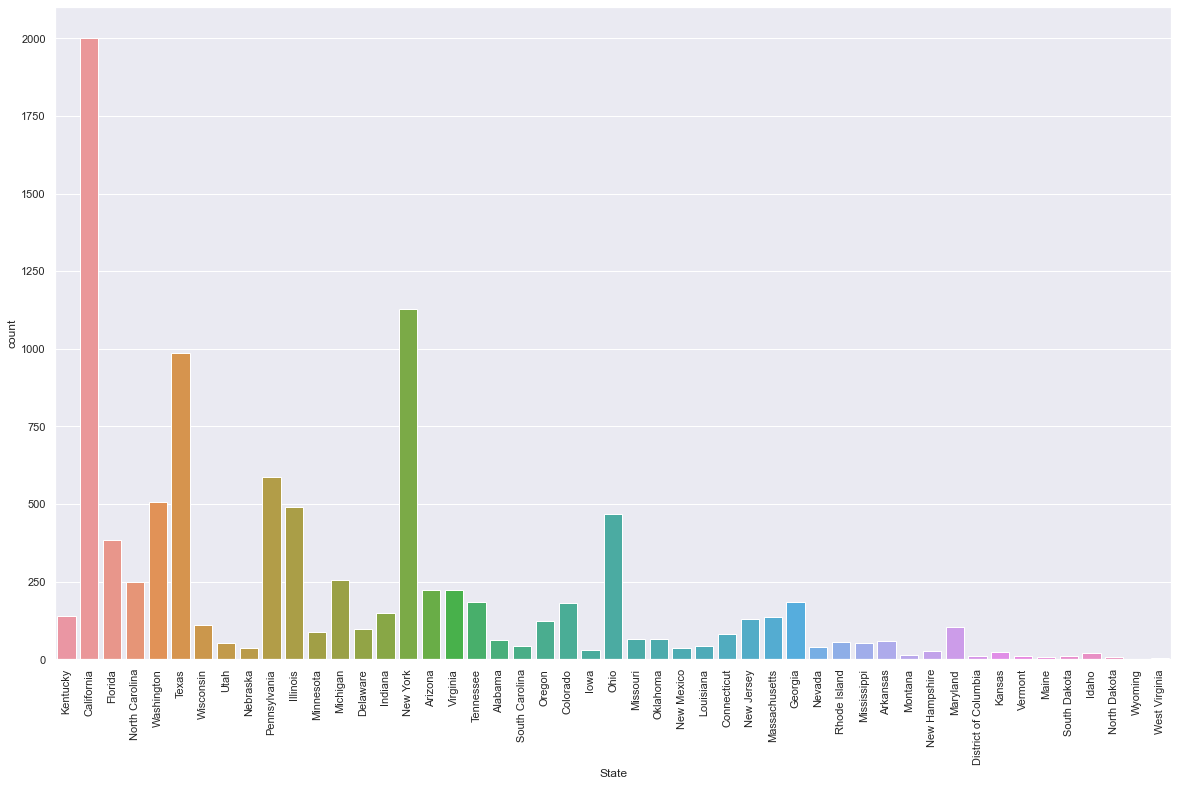

In [17]:
plt.figure(figsize=(20,12))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

<p> <h3>Obserbving the above plots we can see that the states like New York and Calfornia are well benefitting
the store and it can be best bringing new stores in this states as the profits will be increasing</h3></p>
<p> <h3> And also the states like Ohio, Illinois are in loss, but they provide much discount and they need to improve their marketting strategies to provide much more profits to the company</h3></p>

<h2>Let's see how items are likely to provide sales and Profit</h2>

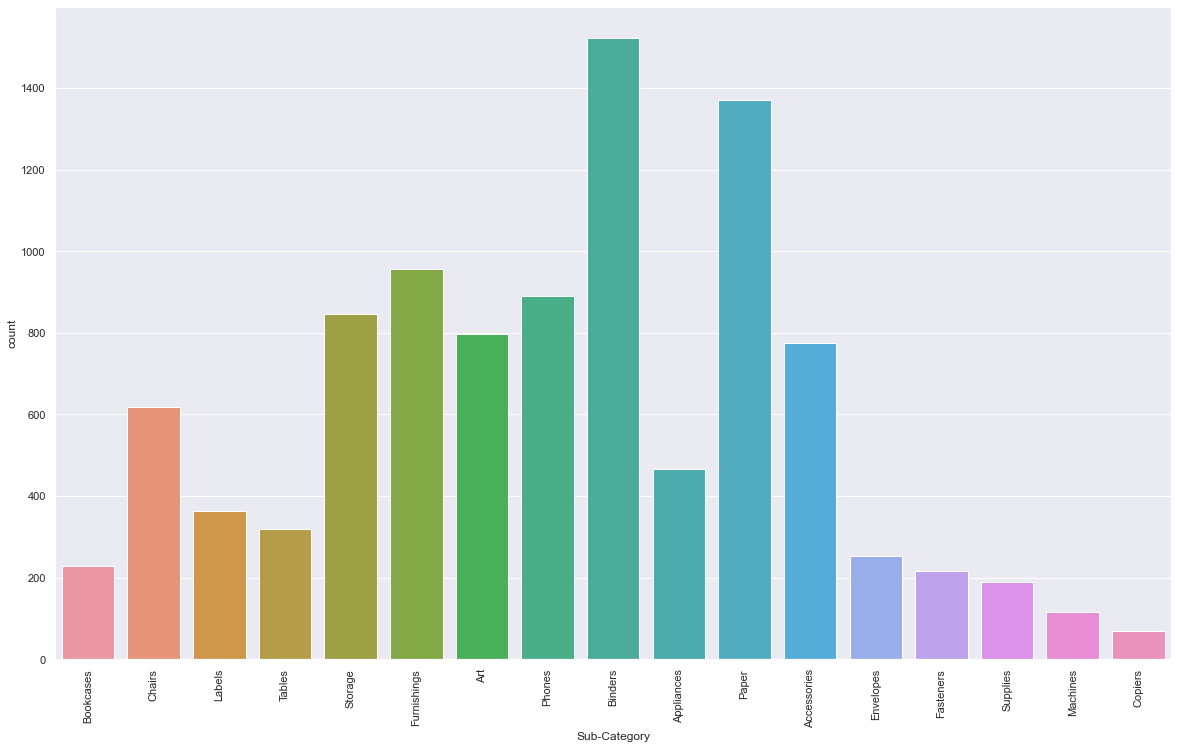

In [18]:
plt.figure(figsize=(20,12))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

###### You can see now that Binders and papers are leading and Furnishings,Phones and arts Follow.

## Your Feedback are Welcome.

### Thank you !!!

## Author

<h3>Felix Hirwa Nshuri</h3>

<ul>
    <li><a href="https://www.linkedin.com/in/hirwa-nshuti/" target="_blank">LinkedIn Profile</a></li>
    <li><a href="https://github.com/hirwa-nshuti" target="_blank">Github Profile</a></li>
</ul>

## Done at
     2021-02-08        

## <h3 align="center"> The Sparks Foundation Internship <h3/>